In [1]:
import yfinance as yf

In [2]:
btc_ticker=yf.Ticker("BTC-USD")

In [3]:
btc=btc_ticker.history(period="max")
btc

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2014-09-17 00:00:00+00:00,465.864014,468.174011,452.421997,457.334015,21056800,0.0,0.0
2014-09-18 00:00:00+00:00,456.859985,456.859985,413.104004,424.440002,34483200,0.0,0.0
2014-09-19 00:00:00+00:00,424.102997,427.834991,384.532013,394.795990,37919700,0.0,0.0
2014-09-20 00:00:00+00:00,394.673004,423.295990,389.882996,408.903992,36863600,0.0,0.0
2014-09-21 00:00:00+00:00,408.084991,412.425995,393.181000,398.821014,26580100,0.0,0.0
...,...,...,...,...,...,...,...
2024-07-26 00:00:00+00:00,65771.812500,68207.601562,65743.765625,67912.062500,30488630457,0.0,0.0
2024-07-27 00:00:00+00:00,67911.812500,69398.507812,66705.218750,67813.335938,34691905492,0.0,0.0
2024-07-28 00:00:00+00:00,67808.656250,68301.851562,67085.828125,68255.867188,18043166945,0.0,0.0


In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [5]:
btc.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3605 entries, 2014-09-17 00:00:00+00:00 to 2024-07-31 00:00:00+00:00
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          3605 non-null   float64
 1   High          3605 non-null   float64
 2   Low           3605 non-null   float64
 3   Close         3605 non-null   float64
 4   Volume        3605 non-null   int64  
 5   Dividends     3605 non-null   float64
 6   Stock Splits  3605 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 225.3 KB


In [6]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=10,6

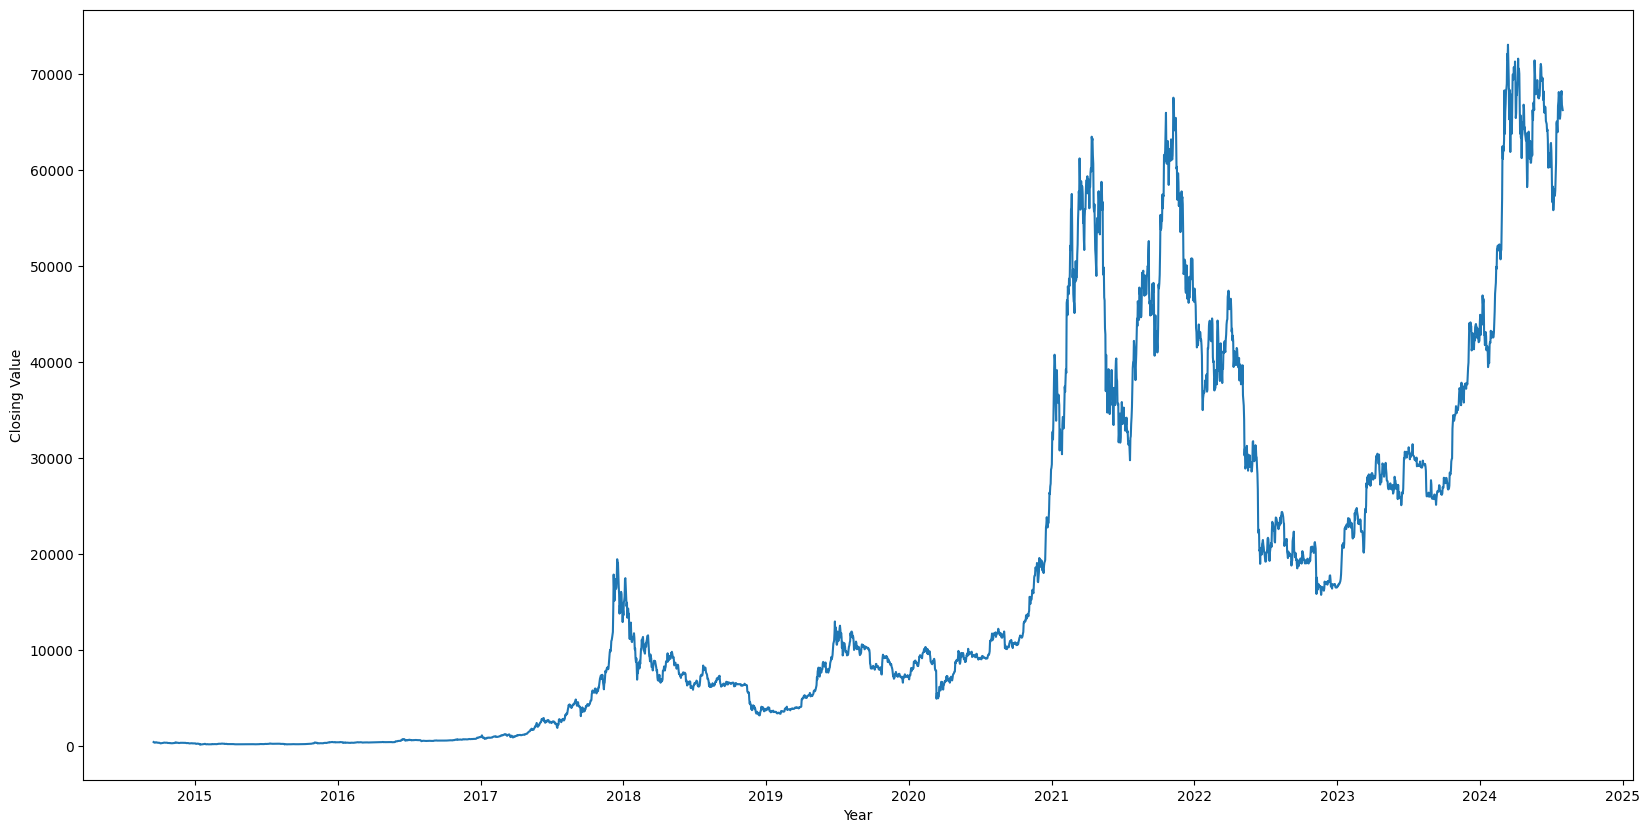

In [7]:
btc=btc['Close'].copy()
plt.figure(figsize=(20,10))
plt.xlabel("Year")
plt.ylabel("Closing Value")
plt.plot(btc)

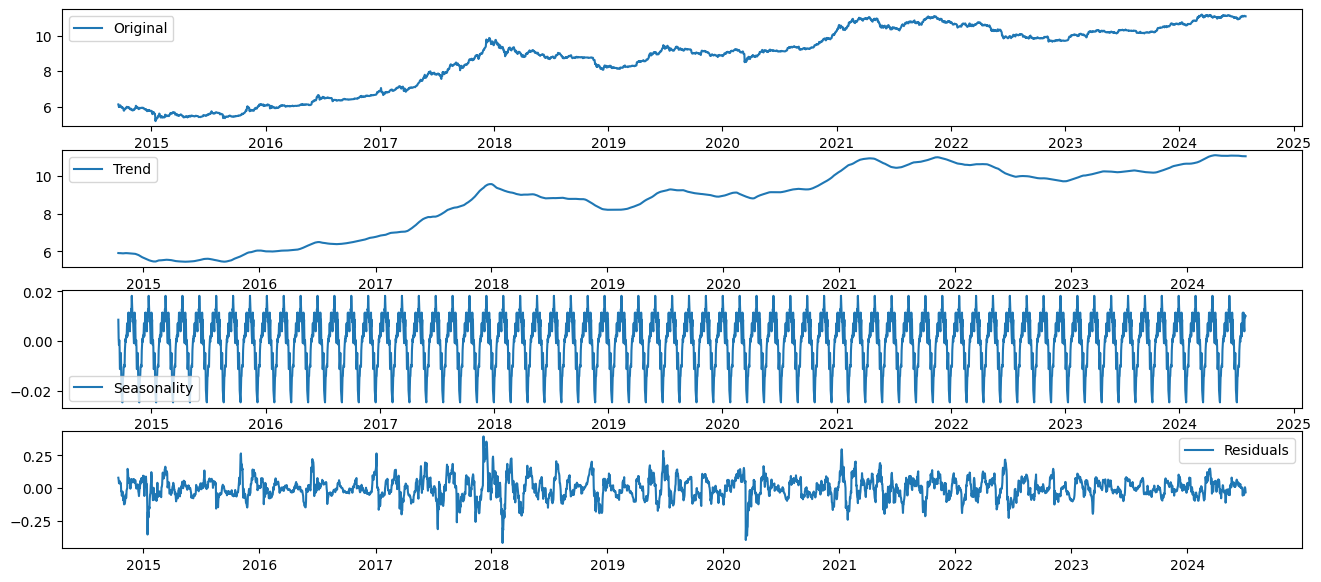

In [8]:
btc=np.log(btc)

from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(btc,period=54)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.figure(figsize=(16,7))
fig = plt.figure(1)

plt.subplot(411)
plt.plot(btc, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')

train = btc.iloc[:len(btc)-365]
test = btc.iloc[len(btc)-365:]

In [9]:
from statsmodels.tsa.stattools import adfuller
print('Dickey-Fuller Test: ')
dftest=adfuller(train, autolag='AIC')
dfoutput=pd.Series(dftest[0:4], index=['Test Statistic','p-value','Lags Used','No. of Obs'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Dickey-Fuller Test: 
Test Statistic            -1.044038
p-value                    0.736866
Lags Used                 10.000000
No. of Obs              3229.000000
Critical Value (1%)       -3.432377
Critical Value (5%)       -2.862436
Critical Value (10%)      -2.567247
dtype: float64


In [10]:
from statsmodels.graphics.tsaplots import plot_acf

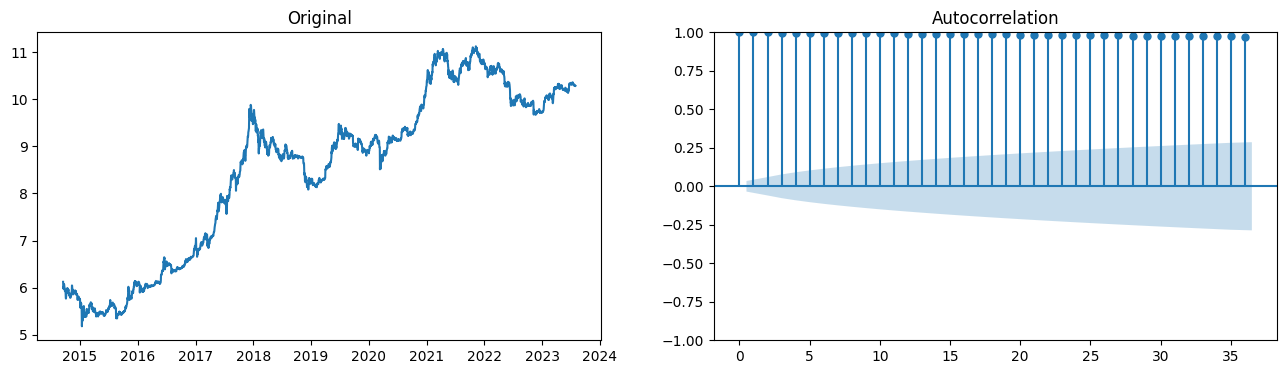

In [11]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(16,4))
ax1.plot(train)
ax1.set_title("Original")
plot_acf(train,ax=ax2);

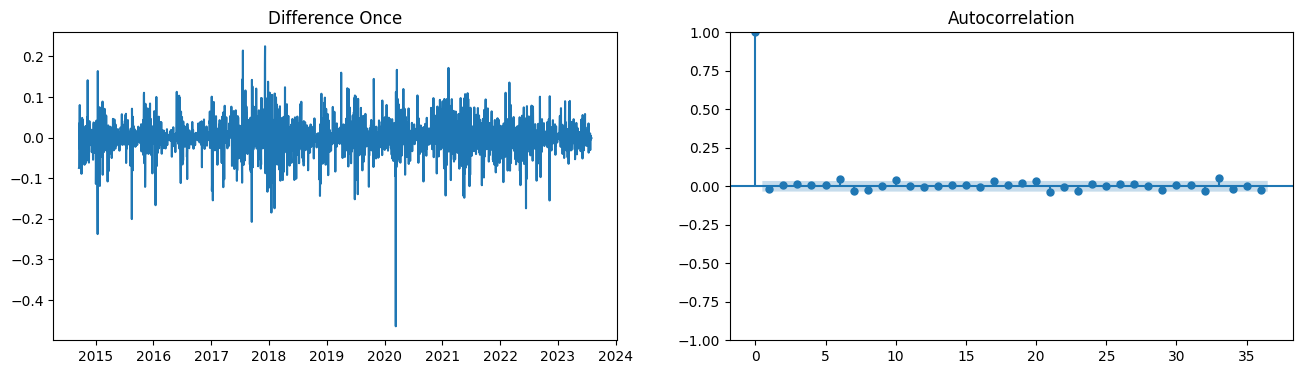

In [12]:
diff=train.diff().dropna()
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(16,4))
ax1.plot(diff)
ax1.set_title("Difference Once")
plot_acf(diff,ax=ax2);

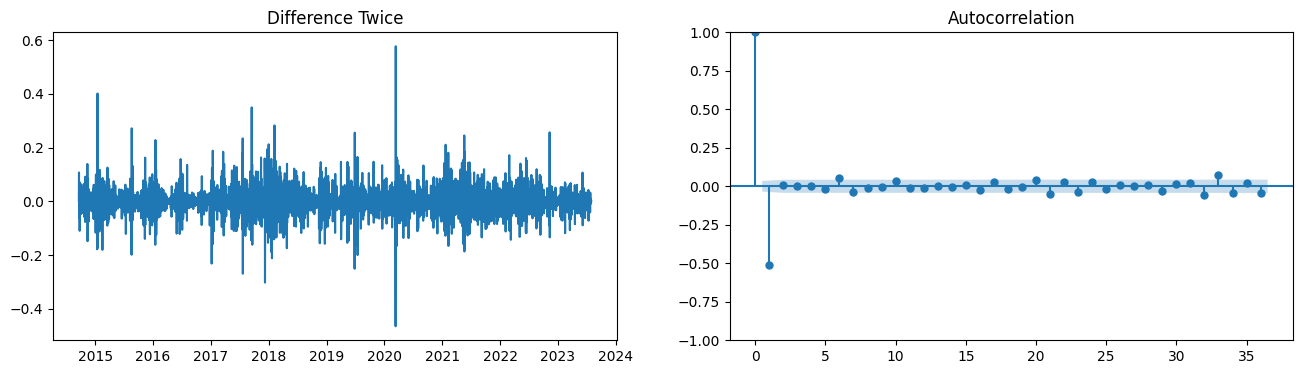

In [13]:
diff=train.diff().diff().dropna()
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(16,4))
ax1.plot(diff)
ax1.set_title("Difference Twice")
plot_acf(diff,ax=ax2);

In [14]:
from statsmodels.graphics.tsaplots import plot_pacf

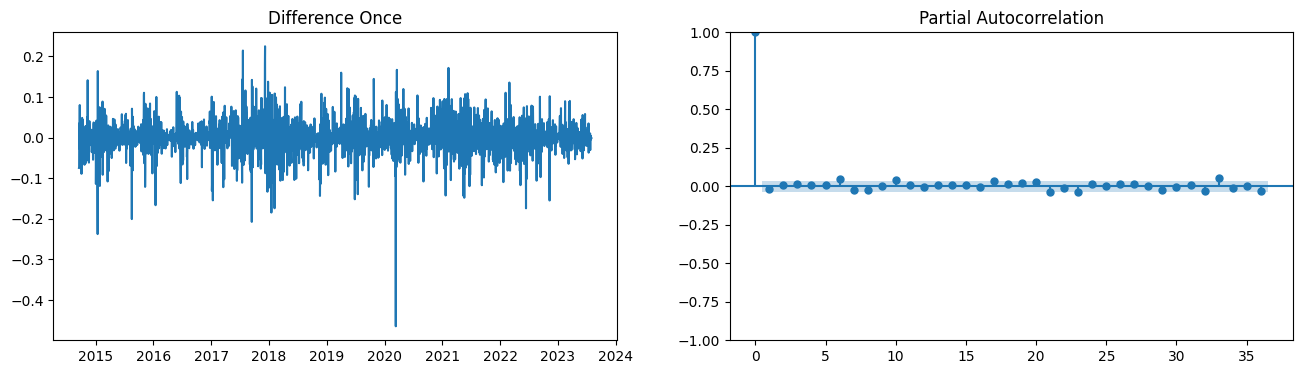

In [15]:
diff=train.diff().dropna()
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(16,4))
ax1.plot(diff)
ax1.set_title("Difference Once")
ax2.set_ylim(0,1)
plot_pacf(diff,ax=ax2);

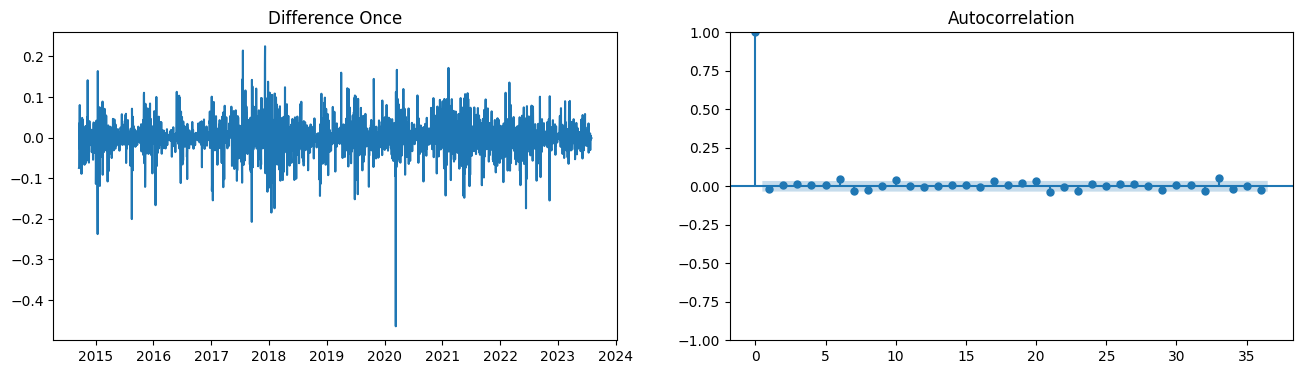

In [16]:
diff=train.diff().dropna()
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(16,4))
ax1.plot(diff)
ax1.set_title("Difference Once")
ax2.set_ylim(0,1)
plot_acf(diff,ax=ax2);

In [17]:
from pmdarima import auto_arima
import warnings
warnings.filterwarnings('ignore')

In [18]:
stepwise_fit=auto_arima(train,trace=True,suppress_warnings=True)
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-12004.384, Time=5.53 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-12011.056, Time=1.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-12010.117, Time=0.45 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-12010.094, Time=2.23 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-12009.336, Time=0.41 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-12008.148, Time=0.53 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 10.193 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 3240
Model:               SARIMAX(0, 1, 0)   Log Likelihood                6007.528
Date:                Wed, 31 Jul 2024   AIC                         -12011.056
Time:                        13:12:42   BIC                         -11998.890
Sample:                    09-17-2014   HQIC                        -12006.697
                         - 07-31-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0013      0.001      1.886      0.059   -5.04e-05       0.003
sigma2         0.0014   1.42e-05    100.805      0.000       0.001       0.001
===================================================================================
Ljung-Box (L1) (Q):                   1.06   Jarque-Bera (JB):             17032.76
Prob(Q):                              0.30   Prob(JB):                         0.00
Heteroskedasticity (H):               1.01   Skew:                            -0.76
Prob(H) (two-sided):                  0.93   Kurtosis:                        14.13
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [19]:
from statsmodels.tsa.arima.model import ARIMA

In [20]:
model=ARIMA(train, order=(0,1,0))
results=model.fit()

In [21]:
print(results.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 3240
Model:                 ARIMA(0, 1, 0)   Log Likelihood                6005.668
Date:                Wed, 31 Jul 2024   AIC                         -12009.336
Time:                        13:12:42   BIC                         -12003.253
Sample:                    09-17-2014   HQIC                        -12007.156
                         - 07-31-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.0014    1.4e-05    102.631      0.000       0.001       0.001
Ljung-Box (L1) (Q):                   1.06   Jarque-Bera (JB):             17032.76
Prob(Q):                              0.30   Pr

In [22]:
residuals=pd.DataFrame(results.resid)

(array([1.51601247e+00, 9.36677458e-04, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 4.68338729e-04]),
 array([-0.46473018,  0.19428424,  0.85329866,  1.51231308,  2.1713275 ,
         2.83034192,  3.48935634,  4.14837075,  4.80738517,  5.46639959,
         6.12541401]),
 <BarContainer object of 10 artists>)

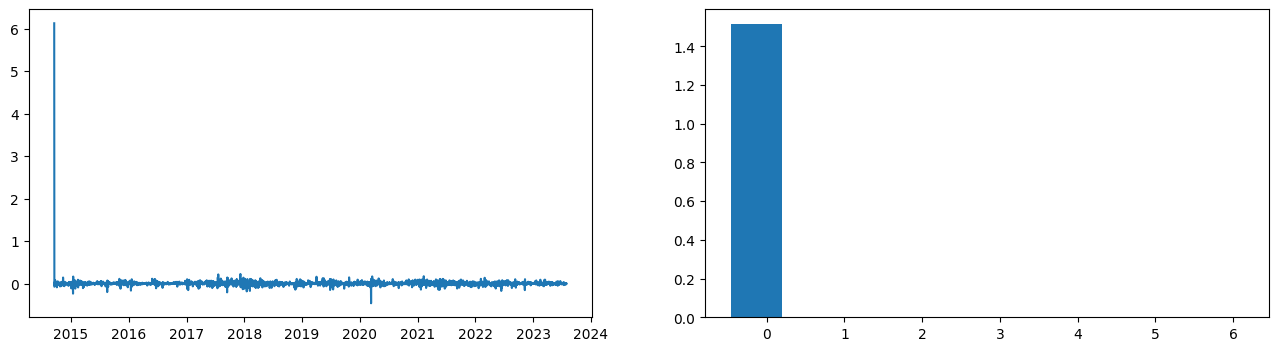

In [23]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(16,4))
ax1.plot(residuals)
ax2.hist(residuals,density=True)

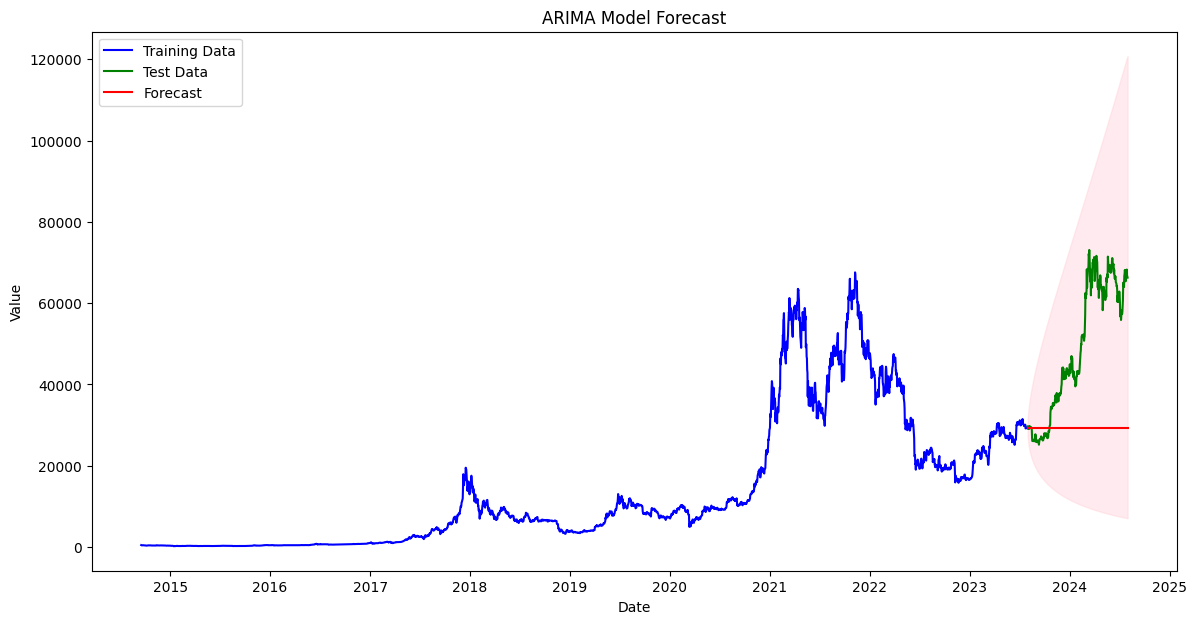

In [24]:
forecast = results.get_forecast(steps=len(test))
forecast_index = test.index
forecast_mean = forecast.predicted_mean
forecast_conf_int = forecast.conf_int()
# Plotting
plt.figure(figsize=(14, 7))

# Plot training data
plt.plot(train.index, np.exp(train), label='Training Data', color='blue')

# Plot test data
plt.plot(test.index, np.exp(test), label='Test Data', color='green')

# Plot forecasts
plt.plot(test.index, np.exp(forecast_mean), label='Forecast', color='red')
plt.fill_between(forecast_index, np.exp(forecast_conf_int.iloc[:, 0]), np.exp(forecast_conf_int.iloc[:, 1]), color='pink', alpha=0.3)
plt.title('ARIMA Model Forecast')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

In [25]:
from statsmodels.tools.eval_measures import rmse
print("Root Mean Squared Error between actual and  predicted values: ",rmse(forecast_mean,test))
print("Mean Value of Test Dataset:", test.mean())

Root Mean Squared Error between actual and  predicted values:  0.5706570430091973
Mean Value of Test Dataset: 10.731407666505469


In [26]:
from sklearn.metrics import r2_score

r2 = r2_score(test, forecast_mean)
print("R-squared:", r2)

R-squared: -1.6148314908807344


In [27]:
train = btc.iloc[len(btc)-365:len(btc)-100]
test = btc.iloc[len(btc)-100:]

In [28]:
from statsmodels.tsa.stattools import adfuller
print('Dickey-Fuller Test: ')
dftest=adfuller(train, autolag='AIC')
dfoutput=pd.Series(dftest[0:4], index=['Test Statistic','p-value','Lags Used','No. of Obs'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Dickey-Fuller Test: 
Test Statistic           -0.069787
p-value                   0.952366
Lags Used                 1.000000
No. of Obs              263.000000
Critical Value (1%)      -3.455461
Critical Value (5%)      -2.872593
Critical Value (10%)     -2.572660
dtype: float64


In [29]:
stepwise_fit=auto_arima(train,trace=True,suppress_warnings=True)
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-1174.857, Time=9.92 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-1177.251, Time=0.15 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-1177.946, Time=0.16 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-1177.793, Time=2.29 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-1175.794, Time=0.07 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-1176.022, Time=0.72 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-1175.639, Time=0.26 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-1174.065, Time=0.66 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-1175.757, Time=0.07 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0] intercept
Total fit time: 14.324 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  265
Model:               SARIMAX(1, 1, 0)   Log Likelihood                 591.973
Date:                Wed, 31 Jul 2024   AIC                          -1177.946
Time:                        13:13:00   BIC                          -1167.218
Sample:                    08-01-2023   HQIC                         -1173.635
                         - 04-21-2024                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0033      0.002      2.064      0.039       0.000       0.006
ar.L1         -0.1009      0.048     -2.122      0.034      -0.194      -0.008
sigma2         0.0007   3.85e-05     17.172      0.000       0.001       0.001
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                69.86
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               2.30   Skew:                             0.08
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.52
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [30]:
model=ARIMA(train, order=(1,1,0))
results=model.fit()

In [31]:
print(results.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  265
Model:                 ARIMA(1, 1, 0)   Log Likelihood                 589.879
Date:                Wed, 31 Jul 2024   AIC                          -1175.757
Time:                        13:13:00   BIC                          -1168.605
Sample:                    08-01-2023   HQIC                         -1172.883
                         - 04-21-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0862      0.047     -1.817      0.069      -0.179       0.007
sigma2         0.0007   3.92e-05     17.118      0.000       0.001       0.001
Ljung-Box (L1) (Q):                   0.05   Jarque-

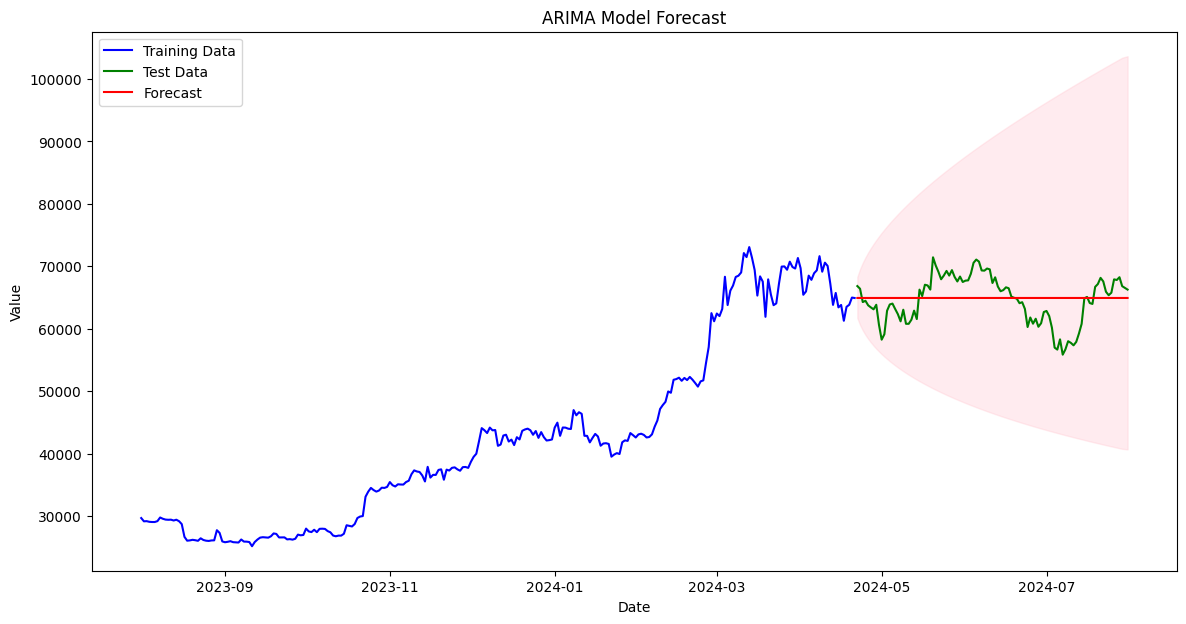

In [32]:
forecast = results.get_forecast(steps=len(test))
forecast_index = test.index
forecast_mean = forecast.predicted_mean
forecast_conf_int = forecast.conf_int()
# Plotting
plt.figure(figsize=(14, 7))

# Plot training data
plt.plot(train.index, np.exp(train), label='Training Data', color='blue')

# Plot test data
plt.plot(test.index, np.exp(test), label='Test Data', color='green')

# Plot forecasts
plt.plot(test.index, np.exp(forecast_mean), label='Forecast', color='red')
plt.fill_between(forecast_index, np.exp(forecast_conf_int.iloc[:, 0]), np.exp(forecast_conf_int.iloc[:, 1]), color='pink', alpha=0.3)
plt.title('ARIMA Model Forecast')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

In [33]:
print("Root Mean Squared Error between actual and  predicted values: ",rmse(forecast_mean,test))
print("Mean Value of Test Dataset:", test.mean())
r2 = r2_score(test, forecast_mean)
print("R-squared:", r2)

Root Mean Squared Error between actual and  predicted values:  0.05994779923207081
Mean Value of Test Dataset: 11.074122797559278
R-squared: -0.01371577095100962
